<a href="https://colab.research.google.com/github/D3moSSS/AI/blob/main/Lab2.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from datetime import date
import numpy
import pandas as panda
import pandas as pd
from pandas import Series
from PIL import Image, ImageFilter
import os

import csv
import cv2
import matplotlib.pyplot as plt
from math import log, sqrt

<ipython-input-56-a1cb2ec6468c>:2: DtypeWarning: Columns (0,18,32,49,56,69,88,100,107,113,139,184,195,201,202,253,266,278,283,285,286,287,288,289,290,291,292,301,322,339,347,355,367) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filename)


Numarul de respondenti: 25974
Numărul total de atribute per respondent: 369
Tipurile de date pentru fiecare atribut:
 Time from Start to Finish (seconds)    object
Q1                                     object
Q2                                     object
Q3                                     object
Q4                                     object
                                        ...  
Q38_B_Part_8                           object
Q38_B_Part_9                           object
Q38_B_Part_10                          object
Q38_B_Part_11                          object
Q38_B_OTHER                            object
Length: 369, dtype: object
Numărul de respondenți cu date complete: 0
Durata medie a studiilor pentru toți respondenții: 3.96 ani
Durata medie a studiilor pentru respondenții din România: 4.16 ani
Durata medie a studiilor pentru femeile din România: 4.75 ani
Numarul de femei din Romania care programeaza in Python : 3877
Intervalul de varsta cu cele mai multe femei care prog

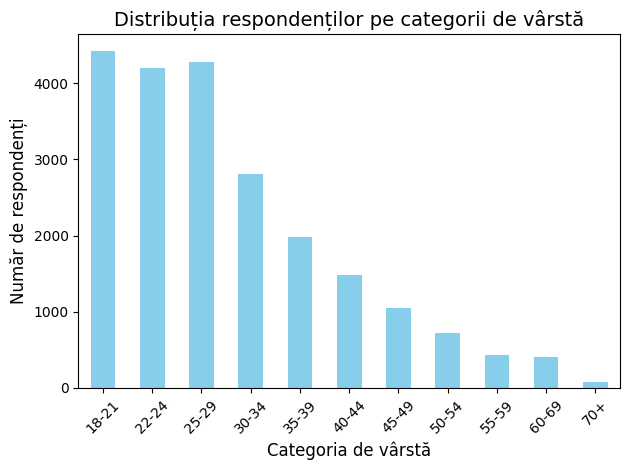

Q1
18-21     3
22-24    11
25-29     7
30-34     6
35-39     8
40-44     8
45-49     4
50-54     4
Name: count, dtype: int64


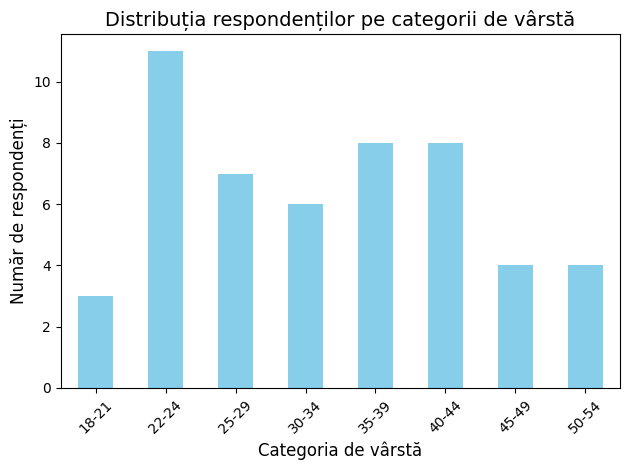

Q1
18-21    1
22-24    3
25-29    2
35-39    5
40-44    1
Name: count, dtype: int64


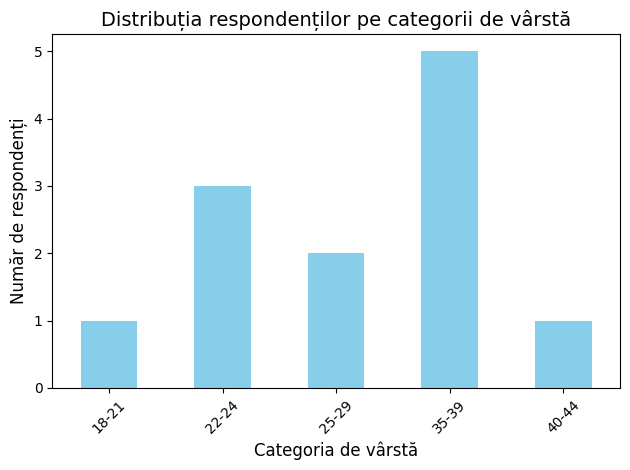

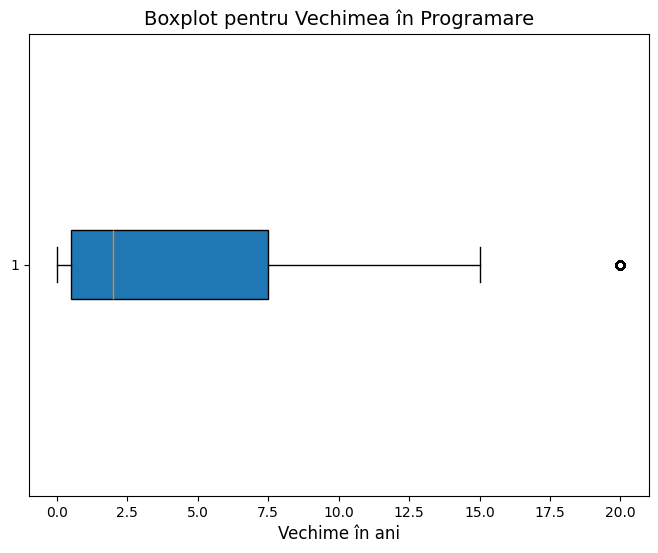

Outlieri identificati:
1        20.0
3        20.0
16       20.0
23       20.0
69       20.0
         ... 
25862    20.0
25887    20.0
25910    20.0
25924    20.0
25963    20.0
Name: vechime_ani, Length: 1860, dtype: float64


In [56]:
filename = "../surveyDataSience.csv"
data = pd.read_csv(filename)

# return: numarul de respondenti
def getNr():
    return len(data)

# Eliminăm primul rând care conține întrebările
data_cleaned = data.iloc[1:].reset_index(drop=True)

# 1. Numărul și tipul informațiilor (atributelor) deținute pentru un respondent
num_atribute = data_cleaned.shape[1]  # Numărul total de coloane
tip_atribute = data_cleaned.dtypes  # Tipul fiecărei coloane

# 2. Numărul de respondenți pentru care se dețin date complete (fără valori lipsă)
num_respondenti_complete = data_cleaned.dropna().shape[0]

print("Numarul de respondenti:" , getNr())
# Afișăm rezultatele
print(f"Numărul total de atribute per respondent: {num_atribute}")
print("Tipurile de date pentru fiecare atribut:\n", tip_atribute)
print(f"Numărul de respondenți cu date complete: {num_respondenti_complete}")

# Dicționar pentru conversia nivelului de studii în ani
mapare_studii = {
    "Bachelor’s degree": 3,
    "Master’s degree": 5,  # 3 ani licență + 2 ani master
    "Doctoral degree": 8  # 3 ani licență + 2 ani master + 3 ani doctorat
}

# Convertim nivelurile de educație în ani de studii
data_cleaned['Ani_Studii'] = data_cleaned['Q4'].map(mapare_studii).fillna(0).astype(int)

# Durata medie a studiilor pentru toți respondenții
media_generala = data_cleaned['Ani_Studii'].mean()

# Durata medie pentru respondenții din România
media_romania = data_cleaned[data_cleaned['Q3'] == 'Romania']['Ani_Studii'].mean()

# Durata medie pentru femeile din România
media_romania_femei = data_cleaned[(data_cleaned['Q3'] == 'Romania') & (data_cleaned['Q2'] == 'Woman')]['Ani_Studii'].mean()

# Afișăm rezultatele
print(f"Durata medie a studiilor pentru toți respondenții: {media_generala:.2f} ani")
print(f"Durata medie a studiilor pentru respondenții din România: {media_romania:.2f} ani")
print(f"Durata medie a studiilor pentru femeile din România: {media_romania_femei:.2f} ani")

filter_data_Python = data_cleaned[(data_cleaned['Q7_Part_1'] == "Python") & (data_cleaned['Q2'] == "Woman")]
print(f"Numarul de femei din Romania care programeaza in Python : {len(filter_data_Python)}")

frecvente = filter_data_Python['Q1'].value_counts()

cel_mai_frecvent_interval = frecvente.idxmax()
print(f"Intervalul de varsta cu cele mai multe femei care programeaza in Python : {cel_mai_frecvent_interval} ")

filter_data_C = data_cleaned[(data_cleaned['Q7_Part_5'] == "C++") & (data_cleaned['Q2'] == "Woman")]

print(f"Numarul de femei din Romania care programeaza in C++ : {len(filter_data_C)}")

frecvente = filter_data_C['Q1'].value_counts()

cel_mai_frecvent_interval = frecvente.idxmax()
print(f"Intervalul de varsta cu cele mai multe femei care programeaza in C++ : {cel_mai_frecvent_interval} ")

interval_map = {
    '20+ years': 20,  # presupunem că 20+ reprezintă 20 de ani
    'I have never written code': 0,  # tratăm această valoare ca NaN
    '< 1 years': 0.5,  # 0.5 ani pentru "< 1 years"
    '1-3 years': 2,  # mijlocul intervalului 1-3 ani
    '5-10 years': 7.5,  # mijlocul intervalului 5-10 ani
    '10-20 years': 15,  # mijlocul intervalului 10-20 ani
    '3-5 years': 4  # mijlocul intervalului 3-5 ani
}

data_cleaned['vechime_ani'] = data_cleaned['Q6'].map(interval_map)

statistici = data_cleaned['vechime_ani'].describe()
print(statistici)

filter = data_cleaned[(data_cleaned['Q7_Part_1'] == 'Python')]

distributie_varsta = filter['Q1'].value_counts().sort_index()
print(distributie_varsta)

distributie_varsta.plot(kind='bar', color='skyblue')

# Setăm titlul și etichetele axelor
plt.title('Distribuția respondenților pe categorii de vârstă', fontsize=14)
plt.xlabel('Categoria de vârstă', fontsize=12)
plt.ylabel('Număr de respondenți', fontsize=12)

# Afișăm graficul
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

filter = data_cleaned[(data_cleaned['Q7_Part_1'] == 'Python') & (data_cleaned['Q3'] == "Romania")]

distributie_varsta = filter['Q1'].value_counts().sort_index()
print(distributie_varsta)

distributie_varsta.plot(kind='bar', color='skyblue')

# Setăm titlul și etichetele axelor
plt.title('Distribuția respondenților pe categorii de vârstă', fontsize=14)
plt.xlabel('Categoria de vârstă', fontsize=12)
plt.ylabel('Număr de respondenți', fontsize=12)

# Afișăm graficul
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

filter = data_cleaned[(data_cleaned['Q7_Part_1'] == 'Python') & (data_cleaned['Q3'] == "Romania") & (data_cleaned['Q2'] == 'Woman')]

distributie_varsta = filter['Q1'].value_counts().sort_index()
print(distributie_varsta)

distributie_varsta.plot(kind='bar', color='skyblue')

# Setăm titlul și etichetele axelor
plt.title('Distribuția respondenților pe categorii de vârstă', fontsize=14)
plt.xlabel('Categoria de vârstă', fontsize=12)
plt.ylabel('Număr de respondenți', fontsize=12)

# Afișăm graficul
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print()

# Calculăm boxplot-ul pentru a vizualiza outlierii
plt.figure(figsize=(8, 6))
plt.boxplot(data_cleaned['vechime_ani'].dropna(), vert=False, patch_artist=True)

# Setăm titluri și etichete
plt.title('Boxplot pentru Vechimea în Programare', fontsize=14)
plt.xlabel('Vechime în ani', fontsize=12)

# Afișăm graficul
plt.show()

Q1 = data_cleaned['vechime_ani'].quantile(0.25)
Q3 = data_cleaned['vechime_ani'].quantile(0.75)

# Calculăm IQR
IQR = Q3 - Q1

# Definim outlierii superiori și inferioari
outlier_inferior = Q1 - 1.5 * IQR
outlier_superior = Q3 + 1.5 * IQR

# Identificăm outlierii
outlieri = data_cleaned[(data_cleaned['vechime_ani'] < outlier_inferior) | (data_cleaned['vechime_ani'] > outlier_superior)]

# Afișăm outlierii
print("Outlieri identificati:")
print(outlieri['vechime_ani'])






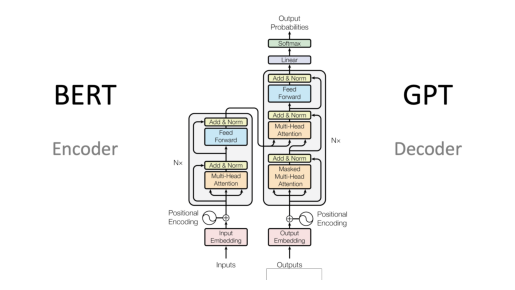

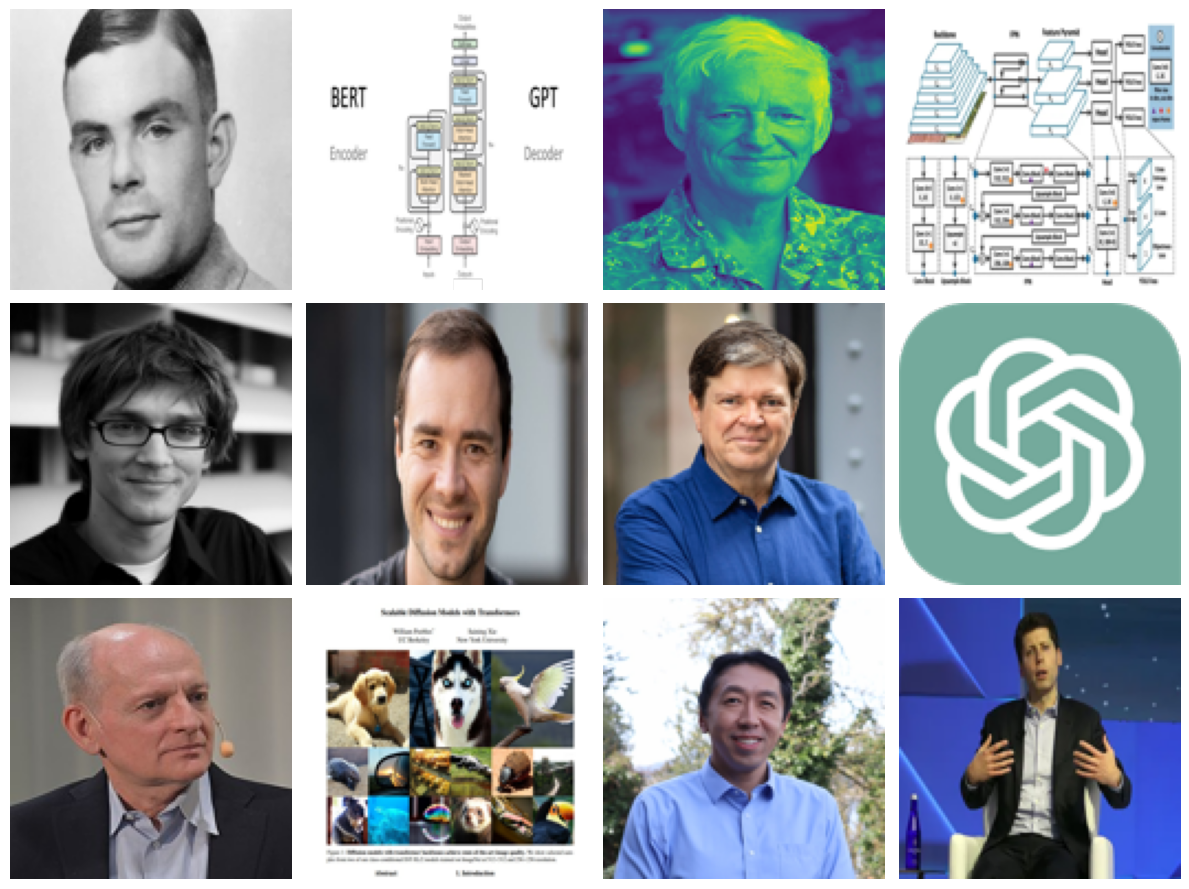

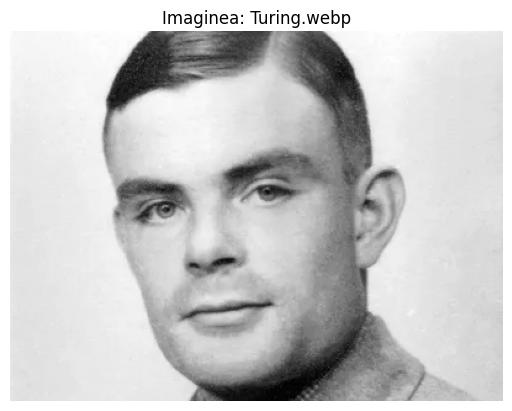

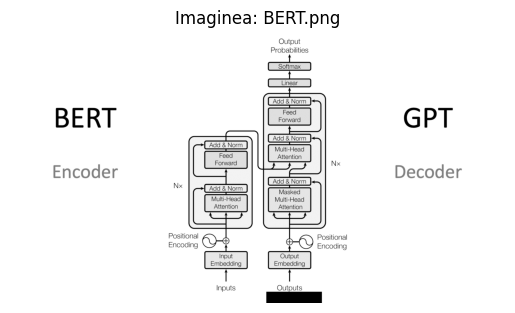

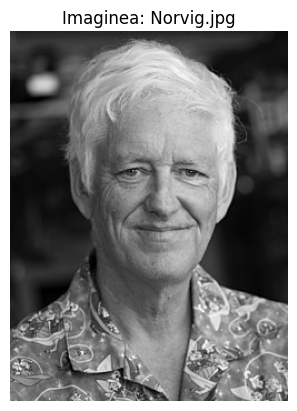

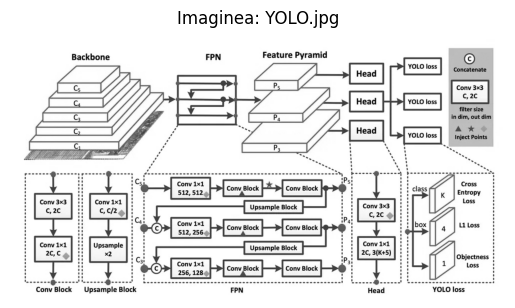

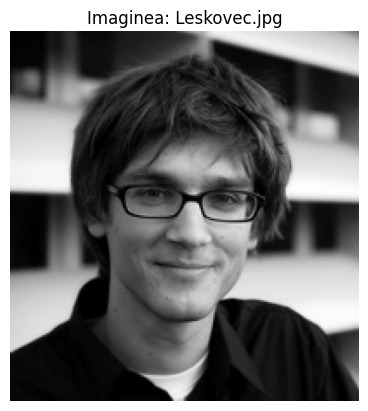

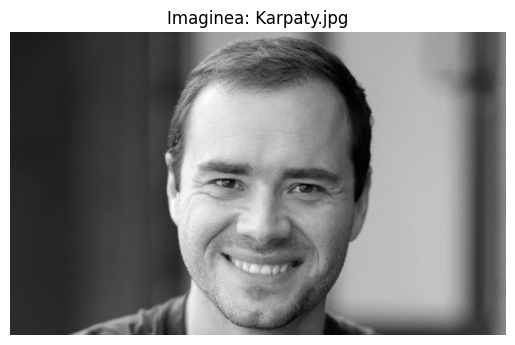

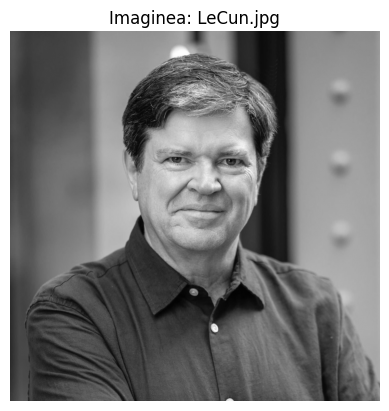

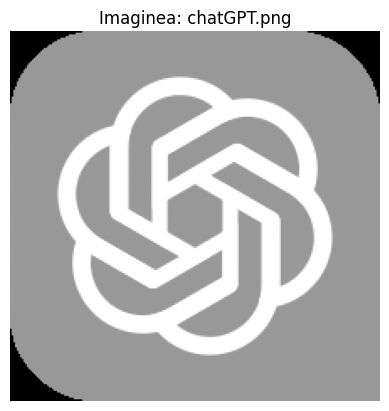

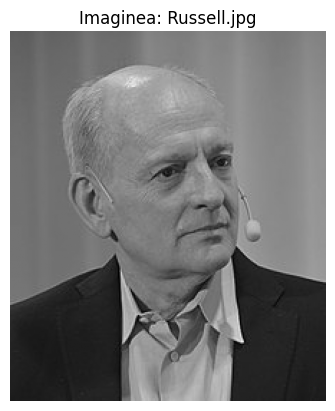

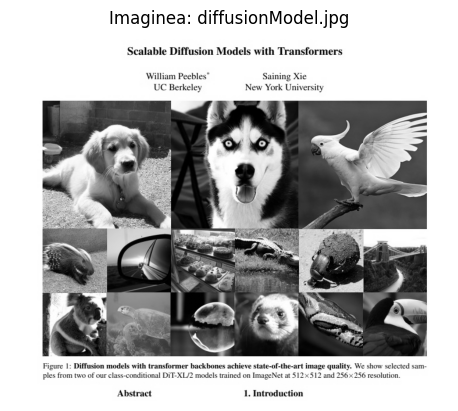

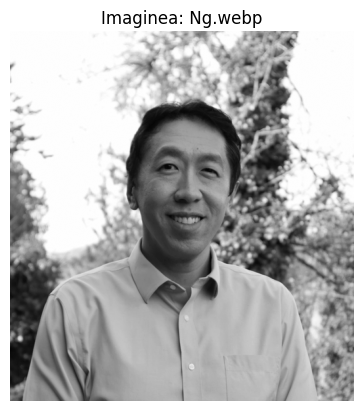

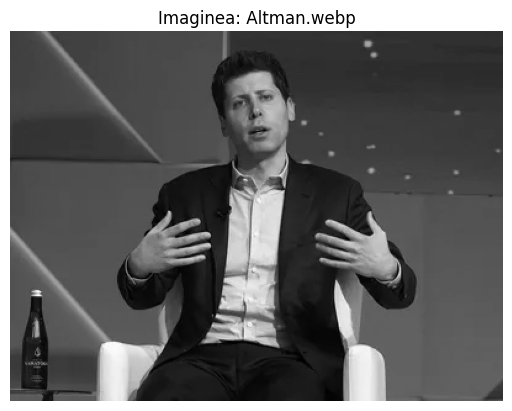

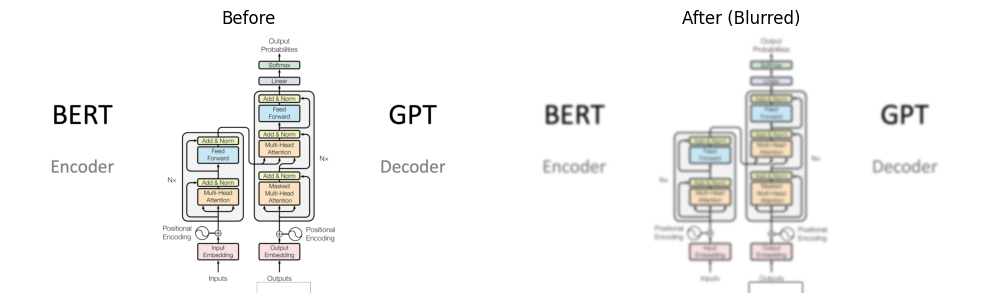

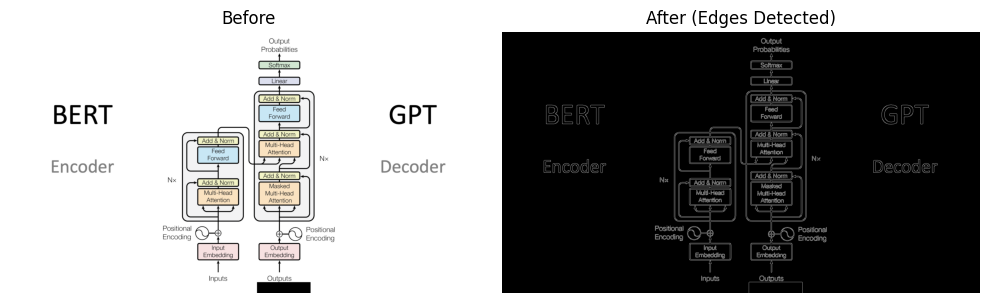

In [9]:
image_path = '/BERT.png'

# Încarcă imaginea folosind PIL
img = Image.open(image_path)

# Vizualizează imaginea
plt.axis('off')
plt.imshow(img)
plt.show()

print()

# Calea către folderul "Images"
folder_path = '/'  # Înlocuiește cu calea corectă

# Listăm toate fișierele din folderul respectiv
image_files = [f for f in os.listdir(folder_path) if f.endswith(('jpg', 'webp', 'png'))]

# Redimensionăm imaginile la 128x128 pixeli
images = []
for file in image_files:
    img_path = os.path.join(folder_path, file)
    img = Image.open(img_path)
    img_resized = img.resize((128, 128))  # Redimensionăm la 128x128 pixeli
    images.append(img_resized)

# Aranjăm imaginile într-un grid tabelar
cols = 4  # Numărul de imagini pe rând
rows = (len(images) // cols) + (1 if len(images) % cols != 0 else 0)  # Calculăm numărul de rânduri necesar

# Creăm figura pentru a vizualiza imaginile
plt.figure(figsize=(cols * 3, rows * 3))

# Afișăm fiecare imagine într-un cadru tabelar
for i, img in enumerate(images):
    plt.subplot(rows, cols, i + 1)  # Creăm subplot pentru fiecare imagine
    plt.imshow(img)
    plt.axis('off')  # Ascundem axele

# Afișăm toate imaginile
plt.tight_layout()
plt.show()






image_files = [f for f in os.listdir(folder_path) if f.endswith(('jpg', 'webp', 'png'))]

# Parcurgem fiecare fișier de imagine
for file in image_files:
    img_path = os.path.join(folder_path, file)
    img = Image.open(img_path)          # Deschidem imaginea
    img_gray = img.convert('L')  # Convertim imaginea la grayscale

    # Vizualizăm imaginea în format grayscale
    plt.imshow(img_gray, cmap='gray')
    plt.axis('off')  # Ascundem axele
    plt.title(f'Imaginea: {file}')  # Titlu pentru fiecare imagine
    plt.show()




image_path = '/BERT.png'  # Înlocuiește cu calea corectă

# Încarcă imaginea originală
img = Image.open(image_path)

# Aplică efectul de blur
img_blurred = img.filter(ImageFilter.GaussianBlur(radius=5))  # radius=5 controlează intensitatea blur-ului

# Creăm o figură cu 2 subplots (before și after)
plt.figure(figsize=(10, 5))

# Imaginea originală
plt.subplot(1, 2, 1)  # 1 rând, 2 coloane, prima imagine
plt.imshow(img)
plt.title("Before")
plt.axis('off')  # Ascundem axele

# Imaginea cu blur
plt.subplot(1, 2, 2)  # 1 rând, 2 coloane, a doua imagine
plt.imshow(img_blurred)
plt.title("After (Blurred)")
plt.axis('off')  # Ascundem axele

# Afișăm compararea "before-after"
plt.tight_layout()
plt.show()





img = cv2.imread(image_path)

# Convertim imaginea în grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Aplicăm detecția muchiilor (Canny Edge Detection)
edges = cv2.Canny(img_gray, threshold1=100, threshold2=200)

# Creăm o figură cu 2 subplots (before și after)
plt.figure(figsize=(10, 5))

# Imaginea originală
plt.subplot(1, 2, 1)  # 1 rând, 2 coloane, prima imagine
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convertim BGR la RGB pentru a vizualiza corect
plt.title("Before")
plt.axis('off')  # Ascundem axele

# Imaginea cu detecția muchiilor
plt.subplot(1, 2, 2)  # 1 rând, 2 coloane, a doua imagine
plt.imshow(edges, cmap='gray')  # Vizualizăm imaginea cu muchii în alb-negru
plt.title("After (Edges Detected)")
plt.axis('off')  # Ascundem axele

# Afișăm compararea "before-after"
plt.tight_layout()
plt.show()

In [73]:
import re
import unicodedata

import nltk
from nltk.corpus import WordNetCorpusReader
from nltk.corpus import wordnet as wn
nltk.download('omw-1.4')

# Asigură-te că ai descărcat resursele necesare
nltk.download('punkt')
nltk.download('wordnet')

file_path = '/texts.txt'  # Înlocuiește cu calea corectă a fișierului tău

# Citim conținutul fișierului
with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

# Folosim o expresie regulată pentru a identifica propozițiile (pe baza semnelor de punctuație)
sentences = re.split(r'[.!?]+', text)

# Filtrăm propozițiile goale (cazuri de text care nu sunt propoziții valide)
sentences = [sentence.strip() for sentence in sentences if sentence.strip()]

# Numărăm propozițiile
num_sentences = len(sentences)

print(f"Numărul de propoziții din fișier este: {num_sentences}")



# Împărțim textul în cuvinte
words = text.split()

# Numărăm cuvintele
num_words = len(words)

print(f"Numărul de cuvinte din fișier este: {num_words}")


# Eliminăm duplicatele folosind un set
unique_words = set(words)

# Numărăm cuvintele unice
num_unique_words = len(unique_words)

print(f"Numărul de cuvinte diferite din fișier este: {num_unique_words}")

words = [word.strip('.,!?”:;()[]{}') for word in words]

print(words)



def remove_diacritics(text):
    return ''.join(
        (c for c in unicodedata.normalize('NFD', text) if unicodedata.category(c) != 'Mn')
    )

# Eliminăm diacriticele din text
text_without_diacritics = remove_diacritics(text)

# Afișăm textul fără diacritice
print(text_without_diacritics)

synonyms = set()


for syn in wordnet.synsets('Confirmare' , lang="ron"):
    for lemma in syn.lemmas('ron'):
        synonyms.add(lemma.name())  # Adăugăm sinonimele (inclusiv cuvintele derivate)

# Afișăm sinonimele
print(f"Cel mai lung cuvânt este: {longest_word}")
print(f"Sinonimele acestui cuvânt sunt: {', '.join(synonyms)}")




Numărul de propoziții din fișier este: 10
Numărul de cuvinte din fișier este: 161
Numărul de cuvinte diferite din fișier este: 105
['Mesaj', 'de', 'informare', 'Cursul', 'și', 'laboratoarele', 'de', 'Inteligență', 'Artificială', 'vor', 'fi', 'o', 'provocare', 'pentru', 'toți', 'Suntem', 'convinși', 'că', 'veți', 'realiza', 'proiecte', 'foarte', 'interesante', 'Vă', 'încurajăm', 'să', 'adresați', 'întrebări', 'atunci', 'când', 'ceva', 'nu', 'e', 'clar', 'atât', 'în', 'mod', 'live', 'cât', 'și', 'folosind', 'platforma', 'Teams', 'canalul', 'general', 'Dacă', 'ați', 'citit', 'până', 'aici', 'vă', 'rugăm', 'să', 'lăsați', 'un', 'mesaj', 'pe', 'canalul', 'general', 'cu', 'textul', 'Confiiiiiiiiiiiiiiiiiiiiiiiiiiiirm', 'că', 'am', 'citit', 'textul', 'pentru', 'problema', '3', 'din', 'lab2', '--', 'Mesaj', 'de', 'informare', 'generat', 'de', 'ChatGPT', 'Stimați', 'cursanți', 'Suntem', 'încântați', 'să', 'vă', 'avem', 'în', 'echipa', 'noastră', 'pentru', 'Cursul', 'și', 'laboratoarele', 'de', 

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


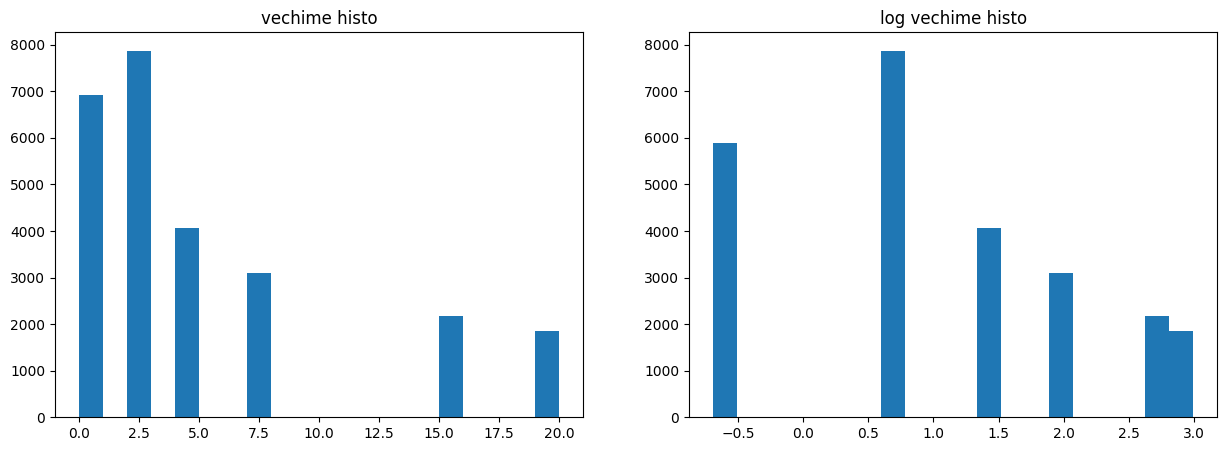

In [49]:
import numpy as np

vechimeLog = [np.log(p) if p > 0 else np.nan for p in data_cleaned['vechime_ani'] ]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.hist(data_cleaned['vechime_ani'], 20)
ax1.set_title('vechime histo')
ax2.hist(vechimeLog, 20)
ax2.set_title('log vechime histo')
plt.show()

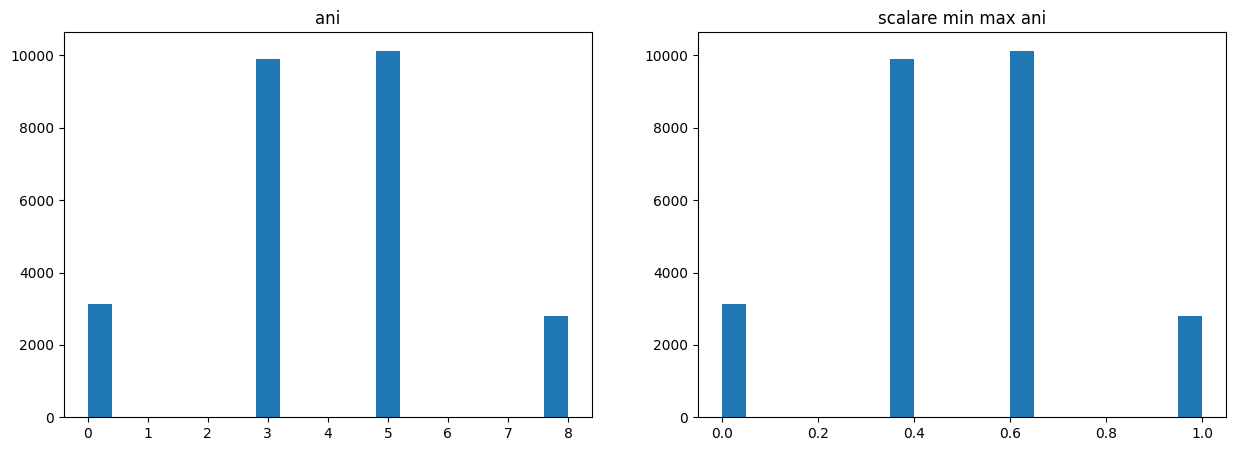

In [51]:
min = data_cleaned['Ani_Studii'].min()
max = data_cleaned['Ani_Studii'].max()

EstimativeScaled = [(p - min) / (max - min) for p in data_cleaned['Ani_Studii']]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.hist(data_cleaned['Ani_Studii'], 20)
ax1.set_title('ani')
ax2.hist(EstimativeScaled, 20)
ax2.set_title('scalare min max ani')
plt.show()

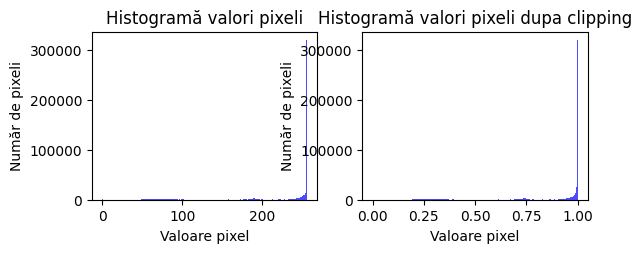

In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("/YOLO.jpg", cv2.IMREAD_GRAYSCALE)

pixel_dist = image.ravel()

plt.subplot(2, 2, 1)
plt.hist(pixel_dist, bins=256, range=[0, 256], color='blue', alpha=0.7)
plt.title("Histogramă valori pixeli")
plt.xlabel("Valoare pixel")
plt.ylabel("Număr de pixeli")

pixel_distClipped = [px/255 for px in pixel_dist]

plt.subplot(2, 2, 2)
plt.hist(pixel_distClipped, bins=256, range=[0, 1], color='blue', alpha=0.7)
plt.title("Histogramă valori pixeli dupa clipping")
plt.xlabel("Valoare pixel")
plt.ylabel("Număr de pixeli")

plt.show()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Propoziția 1: Mesaj de informare: 
Cursul și laboratoarele de Inteligență Artificială vor fi o 
provocare pentru toți
Apariții cuvinte: Counter({'de': 2, 'mesaj': 1, 'informare': 1, 'cursul': 1, 'și': 1, 'laboratoarele': 1, 'inteligență': 1, 'artificială': 1, 'vor': 1, 'fi': 1, 'o': 1, 'provocare': 1, 'pentru': 1, 'toți': 1})


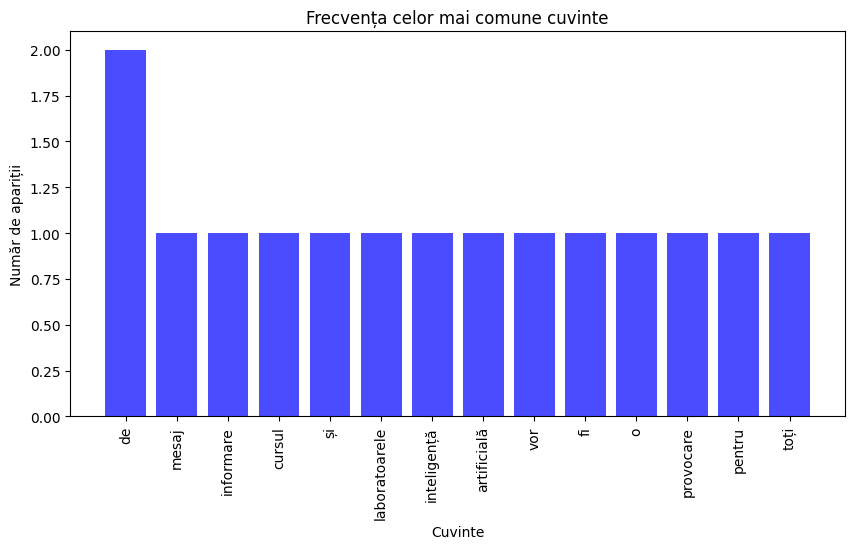

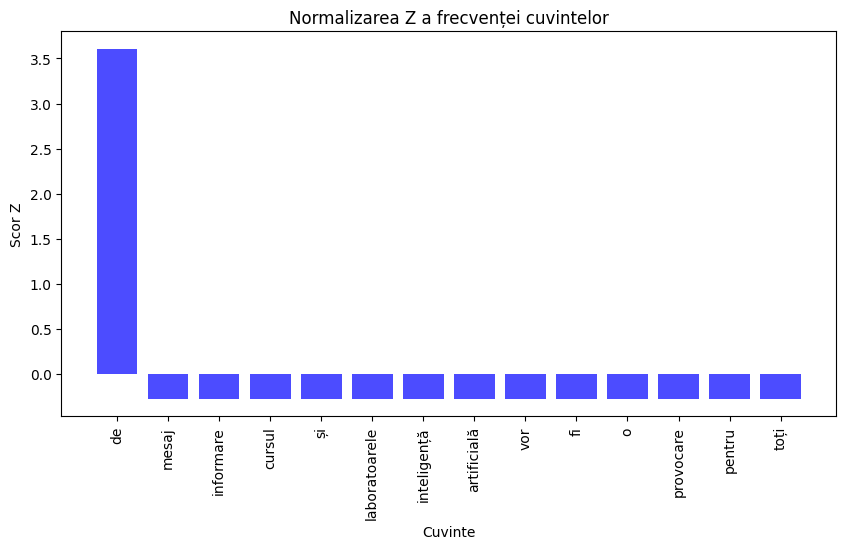

----------------------------------------
Propoziția 2: Suntem convinși că veți realiza proiecte 
foarte interesante
Apariții cuvinte: Counter({'suntem': 1, 'convinși': 1, 'că': 1, 'veți': 1, 'realiza': 1, 'proiecte': 1, 'foarte': 1, 'interesante': 1})


<ipython-input-67-f9151ec6c0fb>:45: RuntimeWarning: invalid value encountered in scalar divide
  z_normalized_values = [(word, (count - mean) / std_dev) for word, count in most_common_words]


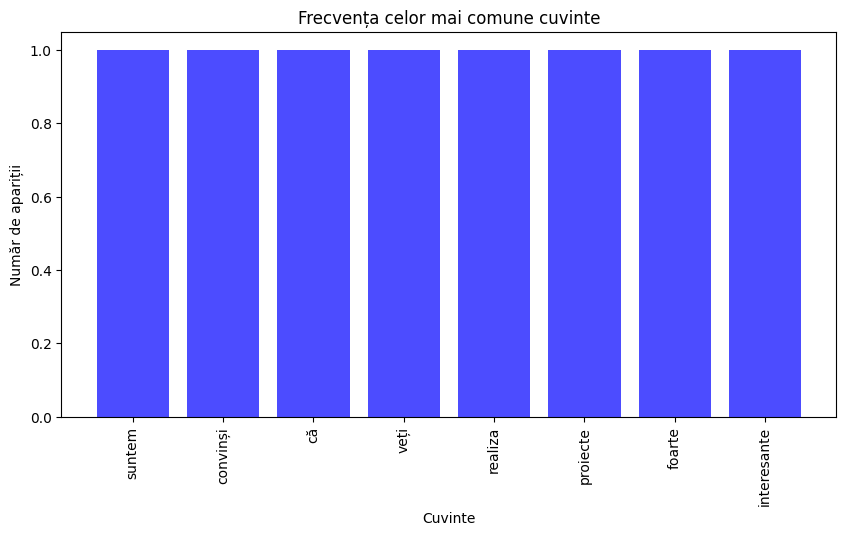

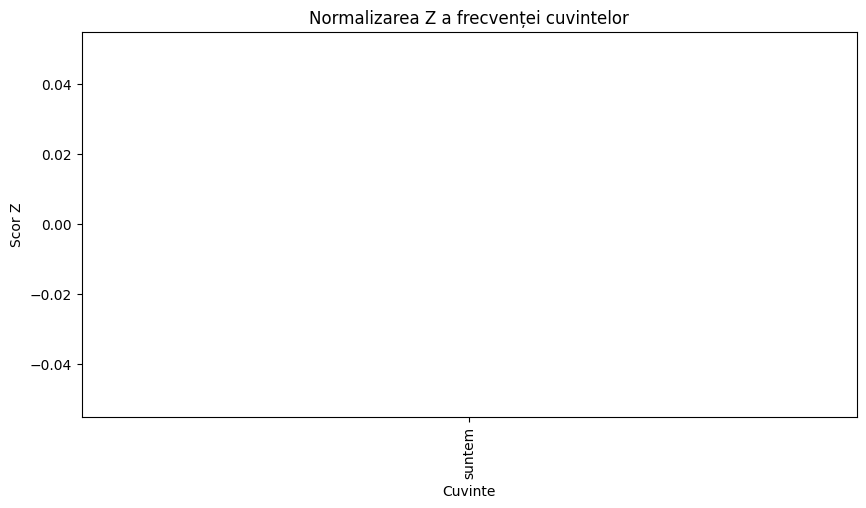

----------------------------------------
Propoziția 3: Vă încurajăm să adresați întrebări atunci 
când ceva nu e clar, atât în mod live, cât și folosind platforma 
Teams, canalul ”general”
Apariții cuvinte: Counter({'vă': 1, 'încurajăm': 1, 'să': 1, 'adresați': 1, 'întrebări': 1, 'atunci': 1, 'când': 1, 'ceva': 1, 'nu': 1, 'e': 1, 'clar': 1, 'atât': 1, 'în': 1, 'mod': 1, 'live': 1, 'cât': 1, 'și': 1, 'folosind': 1, 'platforma': 1, 'teams': 1, 'canalul': 1, '”general”': 1})


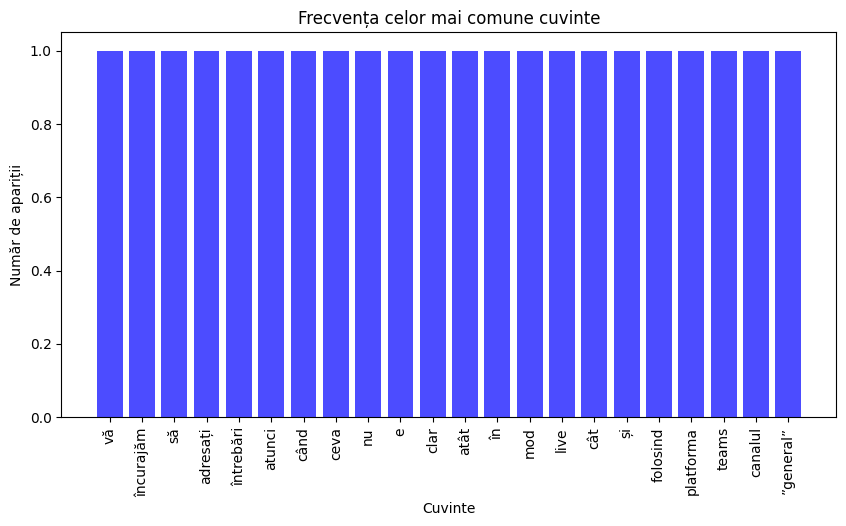

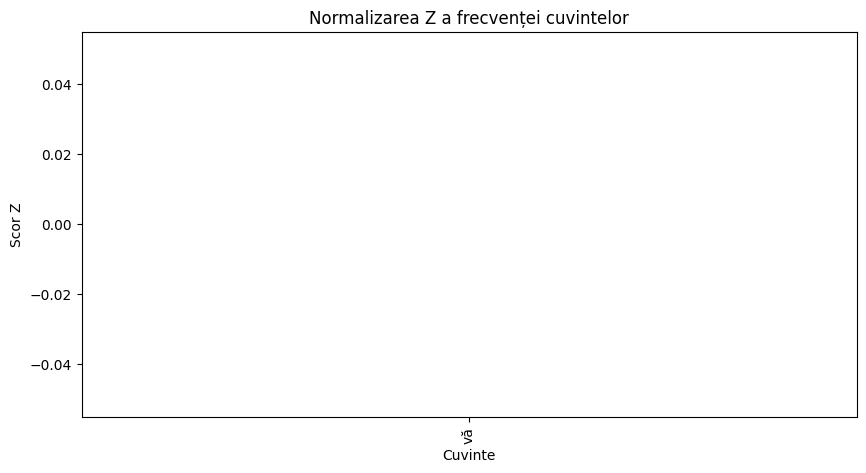

----------------------------------------
Propoziția 4: Dacă ați citit până aici, vă rugăm să lăsați un mesaj pe canalul 
general cu textul ”Confiiiiiiiiiiiiiiiiiiiiiiiiiiiirm că am citit 
textul pentru problema 3 din lab2”
Apariții cuvinte: Counter({'citit': 2, 'textul': 2, 'dacă': 1, 'ați': 1, 'până': 1, 'aici': 1, 'vă': 1, 'rugăm': 1, 'să': 1, 'lăsați': 1, 'un': 1, 'mesaj': 1, 'pe': 1, 'canalul': 1, 'general': 1, 'cu': 1, '”confiiiiiiiiiiiiiiiiiiiiiiiiiiiirm': 1, 'că': 1, 'am': 1, 'pentru': 1, 'problema': 1, '3': 1, 'din': 1, 'lab2”': 1})


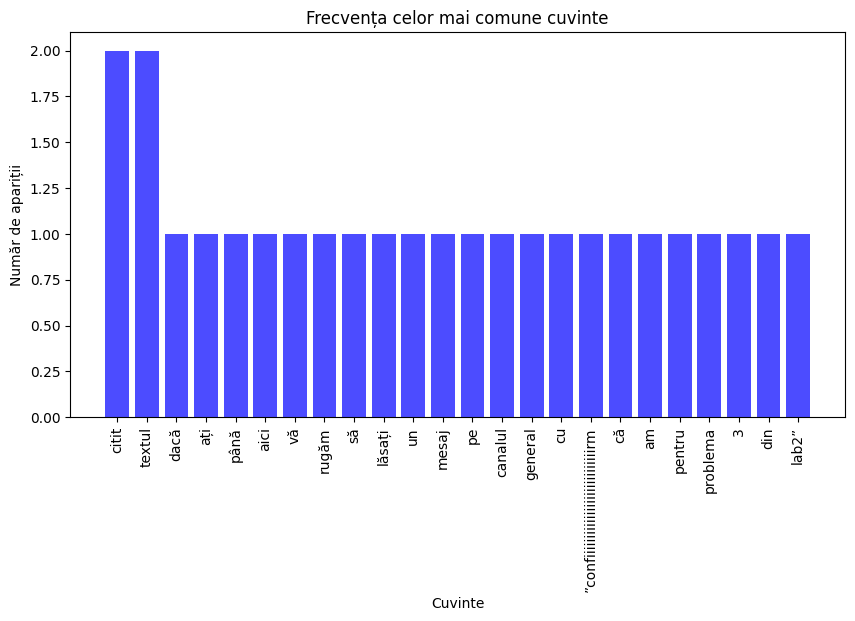

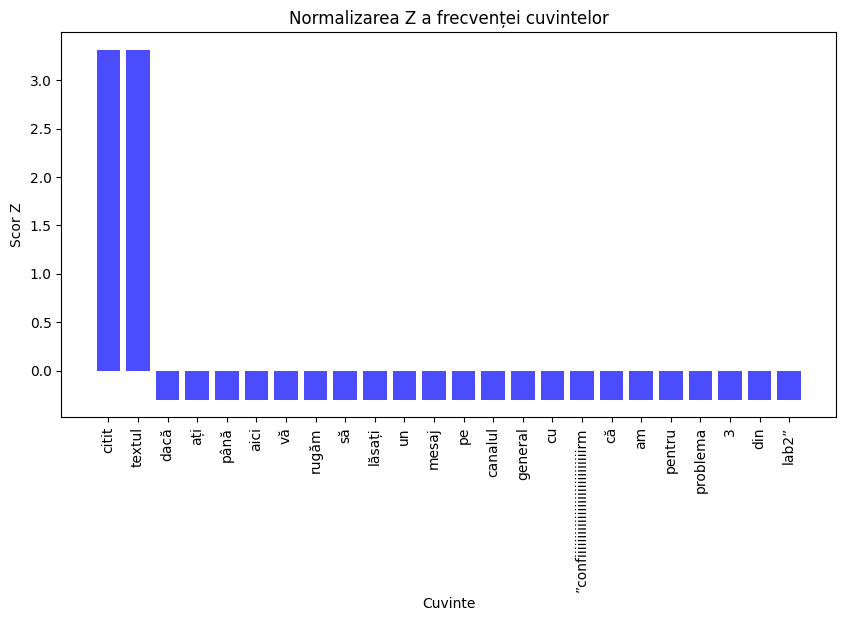

----------------------------------------
Propoziția 5: --
Mesaj de informare generat de ChatGPT:
Stimați cursanți,
Suntem încântați să vă avem în echipa noastră pentru Cursul și 
laboratoarele de Inteligență Artificială
Apariții cuvinte: Counter({'de': 3, 'mesaj': 1, 'informare': 1, 'generat': 1, 'chatgpt': 1, 'stimați': 1, 'cursanți': 1, 'suntem': 1, 'încântați': 1, 'să': 1, 'vă': 1, 'avem': 1, 'în': 1, 'echipa': 1, 'noastră': 1, 'pentru': 1, 'cursul': 1, 'și': 1, 'laboratoarele': 1, 'inteligență': 1, 'artificială': 1})


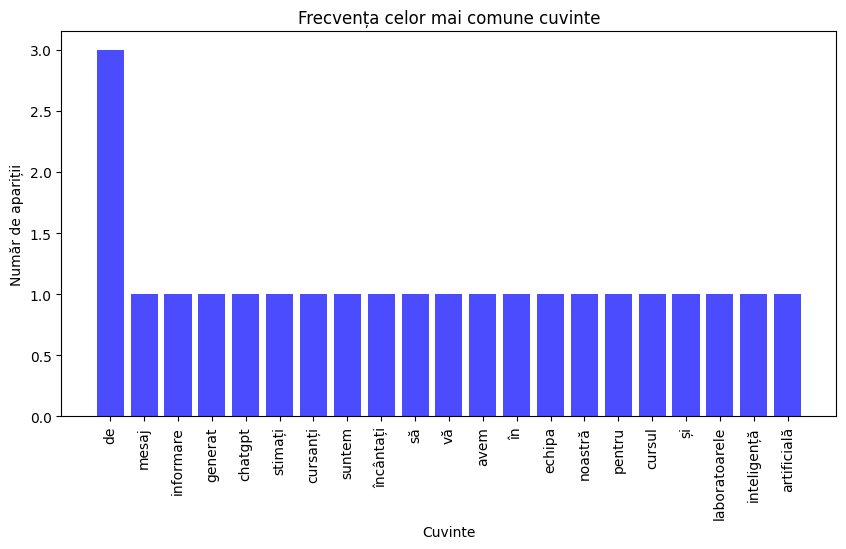

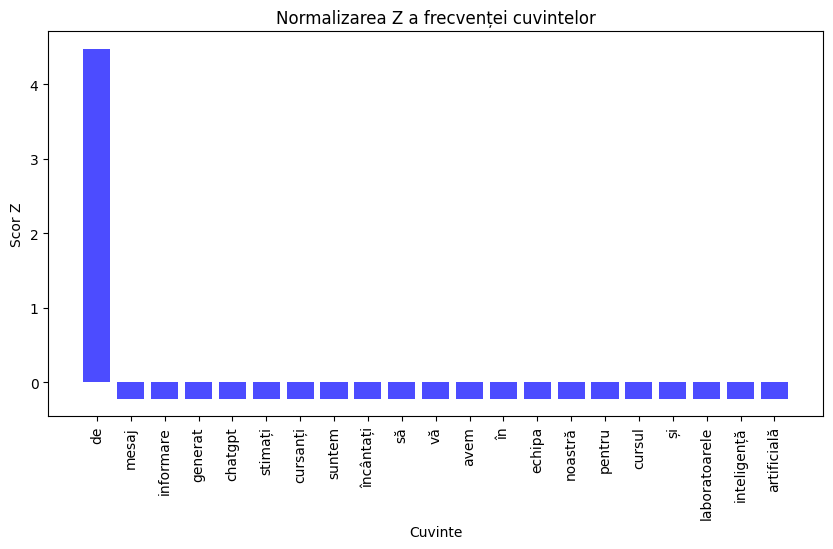

----------------------------------------
Propoziția 6: Această experiență va 
fi o adevărată provocare, dar suntem convinși că veți realiza 
proiecte extrem de interesante
Apariții cuvinte: Counter({'această': 1, 'experiență': 1, 'va': 1, 'fi': 1, 'o': 1, 'adevărată': 1, 'provocare': 1, 'dar': 1, 'suntem': 1, 'convinși': 1, 'că': 1, 'veți': 1, 'realiza': 1, 'proiecte': 1, 'extrem': 1, 'de': 1, 'interesante': 1})


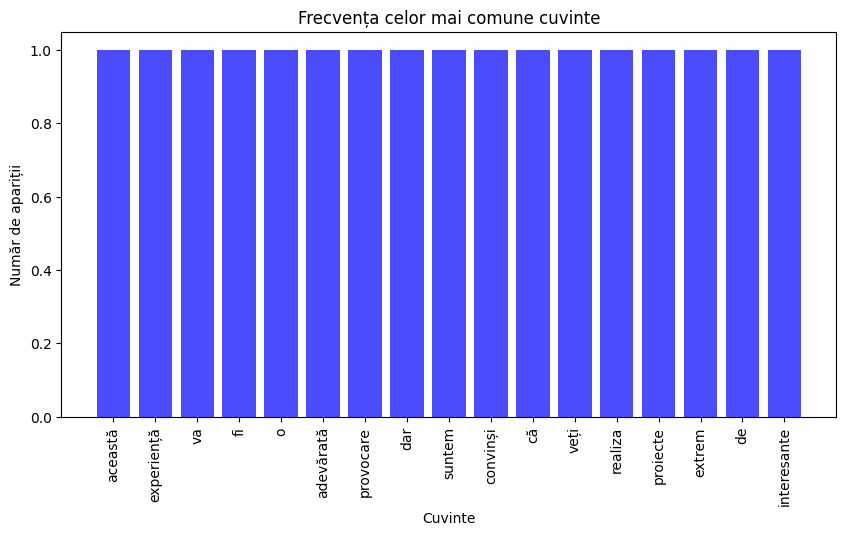

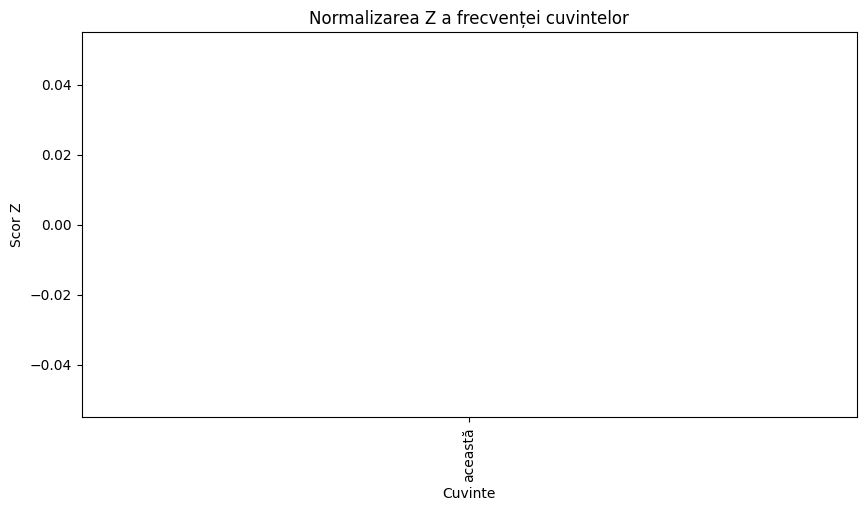

----------------------------------------
Propoziția 7: Vă încurajăm să fiți activi și să adresați întrebări atunci când 
ceva nu este clar
Apariții cuvinte: Counter({'să': 2, 'vă': 1, 'încurajăm': 1, 'fiți': 1, 'activi': 1, 'și': 1, 'adresați': 1, 'întrebări': 1, 'atunci': 1, 'când': 1, 'ceva': 1, 'nu': 1, 'este': 1, 'clar': 1})


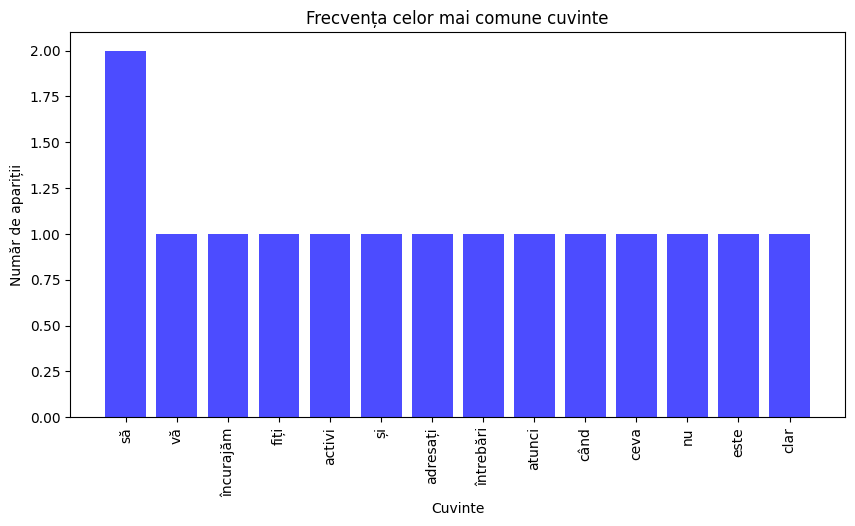

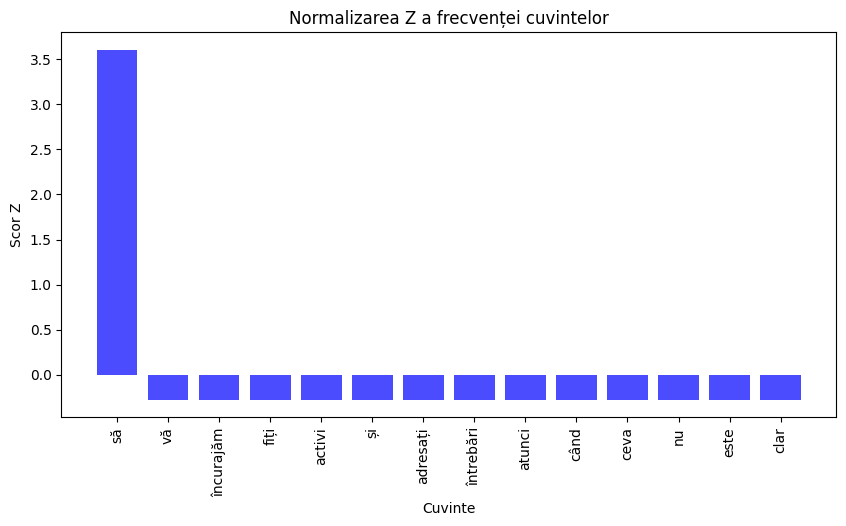

----------------------------------------
Propoziția 8: Fie că este vorba de o discuție în timp real 
sau prin intermediul platformei Teams, canalul ”general”, suntem 
aici să vă sprijinim
Apariții cuvinte: Counter({'fie': 1, 'că': 1, 'este': 1, 'vorba': 1, 'de': 1, 'o': 1, 'discuție': 1, 'în': 1, 'timp': 1, 'real': 1, 'sau': 1, 'prin': 1, 'intermediul': 1, 'platformei': 1, 'teams': 1, 'canalul': 1, '”general”': 1, 'suntem': 1, 'aici': 1, 'să': 1, 'vă': 1, 'sprijinim': 1})


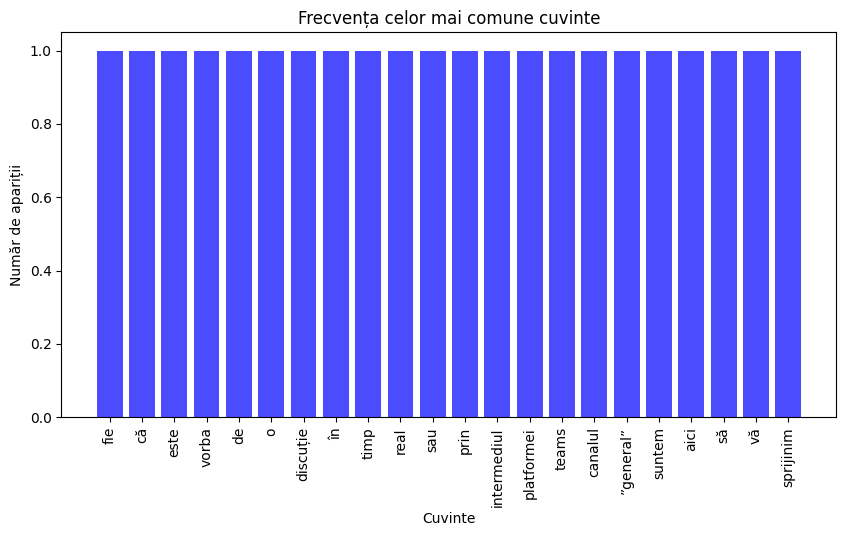

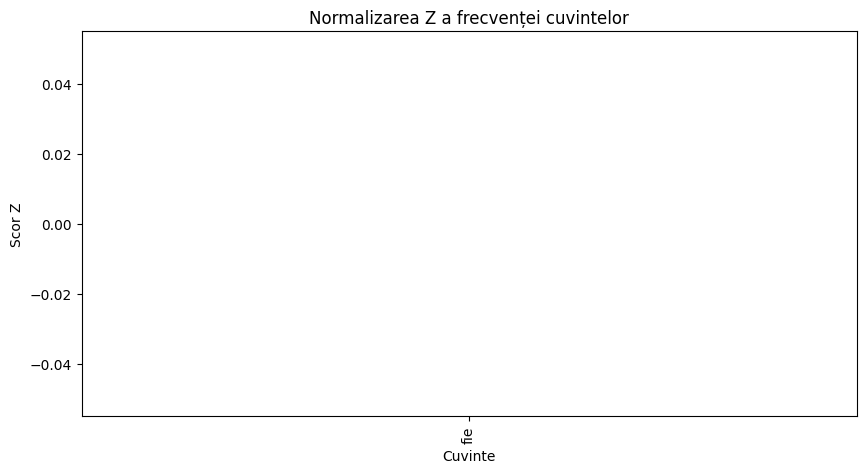

----------------------------------------
Propoziția 9: Succes și să înceapă aventura AI
Apariții cuvinte: Counter({'succes': 1, 'și': 1, 'să': 1, 'înceapă': 1, 'aventura': 1, 'ai': 1})


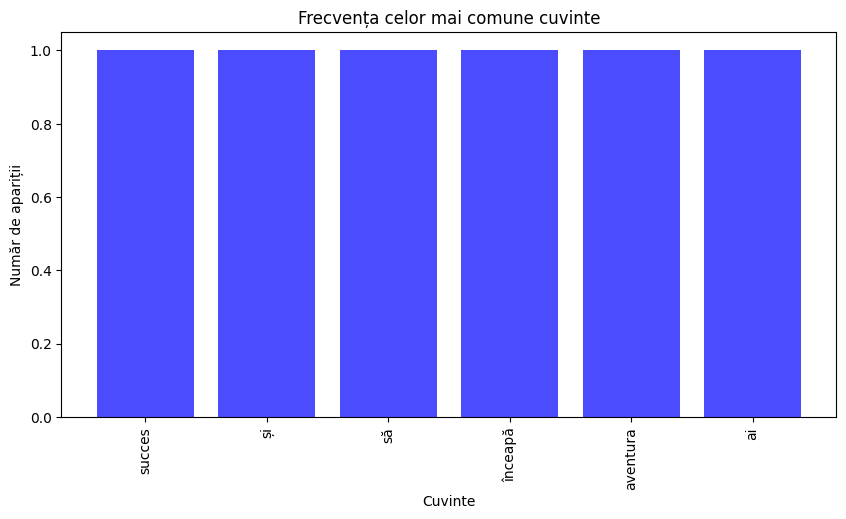

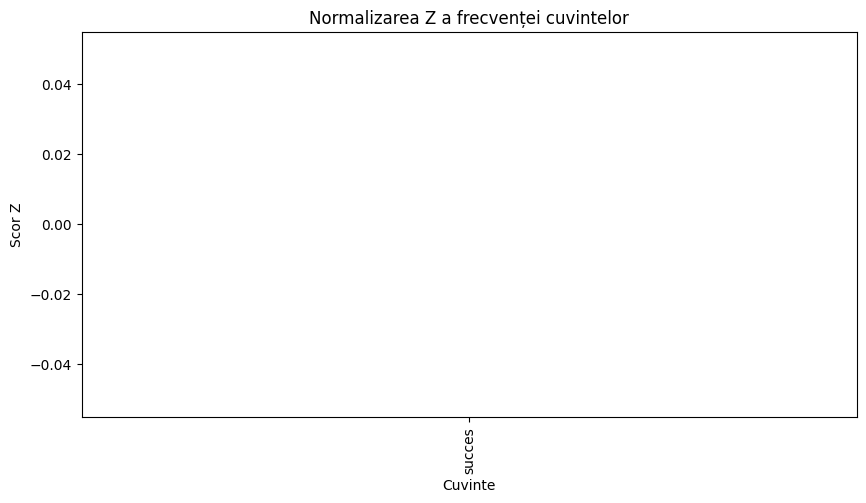

----------------------------------------
Propoziția 10: Cu considerație, Echipa de Inteligență Artificială
Apariții cuvinte: Counter({'cu': 1, 'considerație': 1, 'echipa': 1, 'de': 1, 'inteligență': 1, 'artificială': 1})


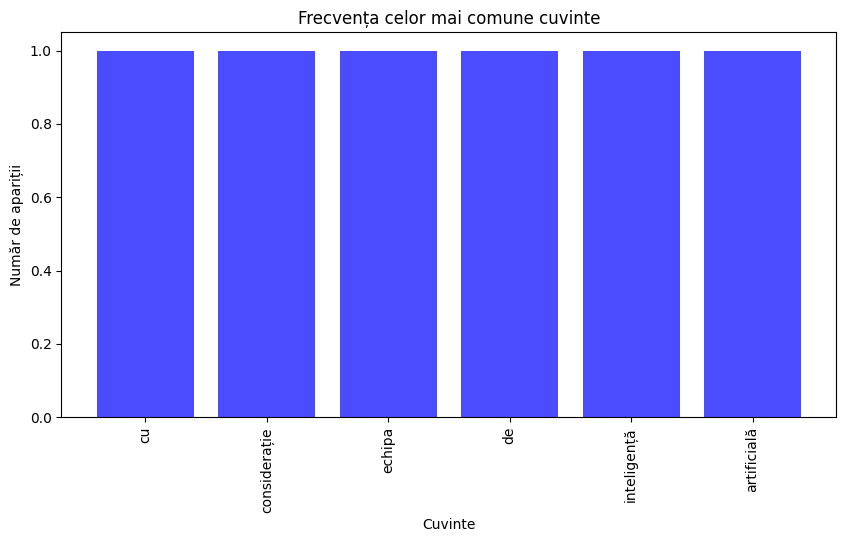

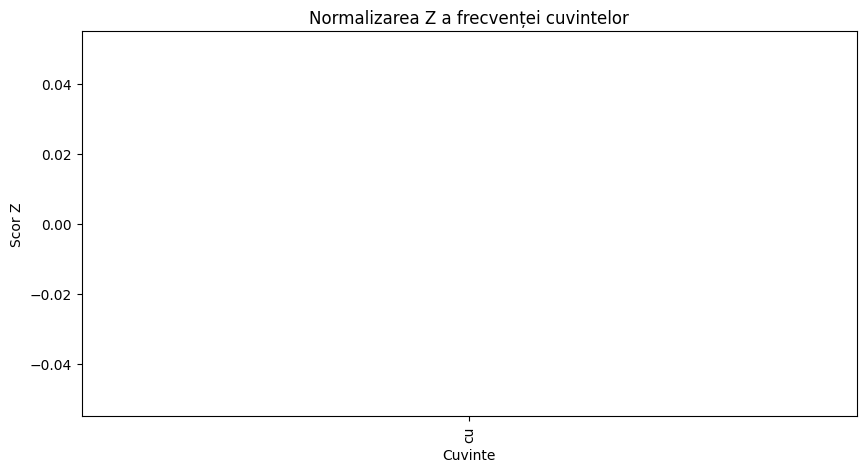

----------------------------------------


In [67]:
import re
import nltk
from collections import Counter
import string


nltk.download('punkt_tab')

# Folosim o expresie regulată pentru a identifica propozițiile (pe baza semnelor de punctuație)
sentences = re.split(r'[.!?]+', text)

# Filtrăm propozițiile goale (cazuri de text care nu sunt propoziții valide)
sentences = [sentence.strip() for sentence in sentences if sentence.strip()]


def word_count_in_sentence(sentence):
    # Împărțim propoziția în cuvinte și eliminăm semnele de punctuație
    words = sentence.translate(str.maketrans("", "", string.punctuation)).lower().split()
    # Folosim Counter pentru a număra aparițiile fiecărui cuvânt
    return Counter(words)

# Calculăm numărul de apariții pentru fiecare propoziție
word_counts = [word_count_in_sentence(sentence) for sentence in sentences]

# Afișăm rezultatele
for i, sentence in enumerate(sentences):
    print(f"Propoziția {i+1}: {sentence}")
    print(f"Apariții cuvinte: {word_counts[i]}")
    most_common_words = word_counts[i].most_common(100)

    labels, values = zip(*most_common_words)

    plt.figure(figsize=(10, 5))
    plt.bar(labels, values, color='blue', alpha=0.7)
    plt.xlabel("Cuvinte")
    plt.ylabel("Număr de apariții")
    plt.title("Frecvența celor mai comune cuvinte")
    plt.xticks(rotation=90)

    frequencies = [count for word, count in most_common_words]
    mean = np.mean(frequencies)
    std_dev = np.std(frequencies)


    z_normalized_values = [(word, (count - mean) / std_dev) for word, count in most_common_words]
    labels, values = zip(*z_normalized_values)
    plt.figure(figsize=(10, 5))
    plt.bar(labels, values, color='blue', alpha=0.7)
    plt.xlabel("Cuvinte")
    plt.ylabel("Scor Z")
    plt.title("Normalizarea Z a frecvenței cuvintelor")
    plt.xticks(rotation=90)
    plt.show()
    print("-" * 40)






